In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
SMOOTHING_ALPHA = 1.0

In [4]:
df = pd.read_csv("Final_cleaned_data.csv")
df.head()

,ISBN,Publisher,Book_Title,Book_Author,First_Publish_Year,Edition_Count,Book_Age,Edition_Count_Category,Total_Reviews,No_of_Pages,Book_Length_Category,Popularity_Score,Book_Price,Bestseller
0,1881320189,River City Pub,Goodbye to the Buttermilk Sky,Julia Oliver,1994,1,33,Low,189,363,Medium,113.8,32.15,1
1,0440295734,Bantam Books,The Testament,John Grisham,1999,62,26,High,588,474,Medium,377.6,37.70,1
2,0553502271,Random House Audio,The Testament,John Grisham,1999,61,26,High,8,116,Short,29.2,5.80,0
3,0439095026,Scholastic,Tell Me This Isn't Happening,Robynn Clairday,1999,1,26,Low,165,440,Medium,99.4,32.00,1
4,0060168013,Harpercollins,Pigs in Heaven,Barbara Kingsolver,1993,13,32,Medium,88,451,Medium,58.0,38.55,1


In [7]:
ros = RandomOverSampler(random_state=42)
evaluation_results = {}

In [39]:
print("\nMultinomialNB Feature Set:")
features_mnb = ['Edition_Count', 'Total_Reviews', 'No_of_Pages']
X = df[features_mnb]
y = df['Bestseller']
print(X.head())


MultinomialNB Feature Set:
   Edition_Count  Total_Reviews  No_of_Pages
0              1            189          363
1             62            588          474
2             61              8          116
3              1            165          440
4             13             88          451


In [41]:
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("\nMultinomialNB - Training Set:")
print(X_train.head())
print("\nMultinomialNB - Test Set:")
print(X_test.head())


MultinomialNB - Training Set:
      Edition_Count  Total_Reviews  No_of_Pages
575               3            180          890
1034              2             34          861
1476             39              1          881
1121              3            127          723
720               1            581          226

MultinomialNB - Test Set:
      Edition_Count  Total_Reviews  No_of_Pages
614               2            329          346
1473              9            105          840
1564              4             23          186
1696              5             23          762
855              10            101          944


In [43]:
model = MultinomialNB(alpha=SMOOTHING_ALPHA)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

evaluation_results["MultinomialNB"] = {
    "acc": acc,
    "cm": cm,
    "fpr": fpr,
    "tpr": tpr,
    "auc": roc_auc
}

In [45]:
print("\nBernoulliNB Feature Set :")
features_bnb = ['Popularity_Score', 'Book_Price']
X = df[features_bnb].apply(lambda x: x > x.median()).astype(int)
y = df['Bestseller']
print(X.head())


BernoulliNB Feature Set :
   Popularity_Score  Book_Price
0                 0           0
1                 1           0
2                 0           0
3                 0           0
4                 0           0


In [47]:
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("\nBernoulliNB - Training Set:")
print(X_train.head())
print("\nBernoulliNB - Test Set:")
print(X_test.head())


BernoulliNB - Training Set:
      Popularity_Score  Book_Price
575                  0           1
1034                 0           1
1476                 0           1
1121                 0           0
720                  1           0

BernoulliNB - Test Set:
      Popularity_Score  Book_Price
614                  0           0
1473                 0           1
1564                 0           0
1696                 0           0
855                  0           1


In [49]:
model = BernoulliNB(alpha=SMOOTHING_ALPHA)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

evaluation_results["BernoulliNB"] = {
    "acc": acc,
    "cm": cm,
    "fpr": fpr,
    "tpr": tpr,
    "auc": roc_auc
}

In [51]:
print("\nCategoricalNB Feature Set:")
le1 = LabelEncoder()
le2 = LabelEncoder()
df['Edition_Encoded'] = le1.fit_transform(df['Edition_Count_Category'])
df['Length_Encoded'] = le2.fit_transform(df['Book_Length_Category'])
X = df[['Edition_Encoded', 'Length_Encoded']]
y = df['Bestseller']
print(X.head())


CategoricalNB Feature Set:
   Edition_Encoded  Length_Encoded
0                1               1
1                0               1
2                0               2
3                1               1
4                2               1


In [53]:
X_res, y_res = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

print("\nCategoricalNB - Training Set:")
print(X_train.head())
print("\nCategoricalNB - Test Set:")
print(X_test.head())


CategoricalNB - Training Set:
      Edition_Encoded  Length_Encoded
575                 1               0
1034                1               0
1476                0               0
1121                1               0
720                 1               1

CategoricalNB - Test Set:
      Edition_Encoded  Length_Encoded
614                 1               1
1473                2               0
1564                1               2
1696                1               0
855                 2               0


In [55]:
model = CategoricalNB(alpha=SMOOTHING_ALPHA)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

evaluation_results["CategoricalNB"] = {
    "acc": acc,
    "cm": cm,
    "fpr": fpr,
    "tpr": tpr,
    "auc": roc_auc
}


MultinomialNB Accuracy: 0.8929
MultinomialNB Confusion Matrix :
[[247  22]
 [ 37 245]]


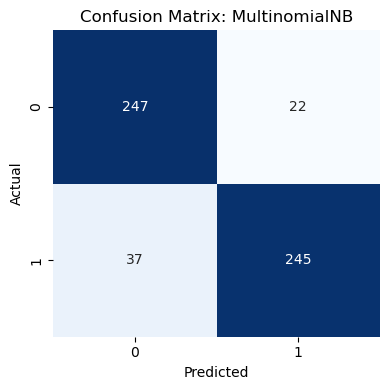

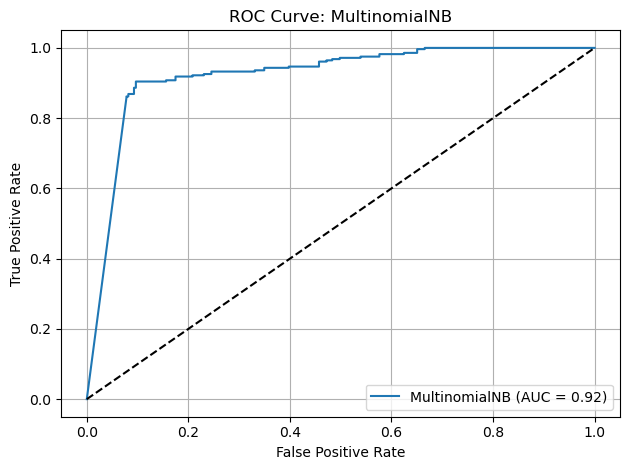


CategoricalNB Accuracy: 0.5535
CategoricalNB Confusion Matrix :
[[190  79]
 [167 115]]


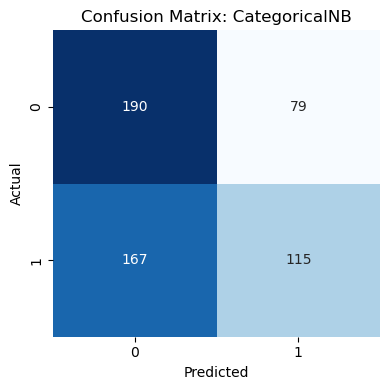

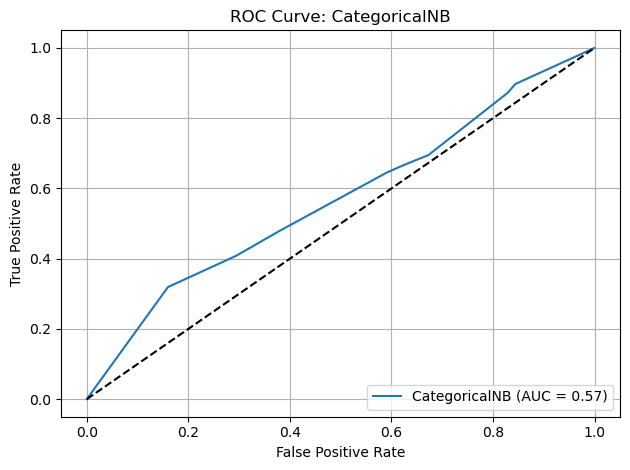


BernoulliNB Accuracy: 0.7804
BernoulliNB Confusion Matrix :
[[207  62]
 [ 59 223]]


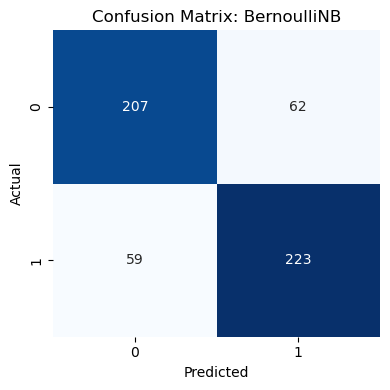

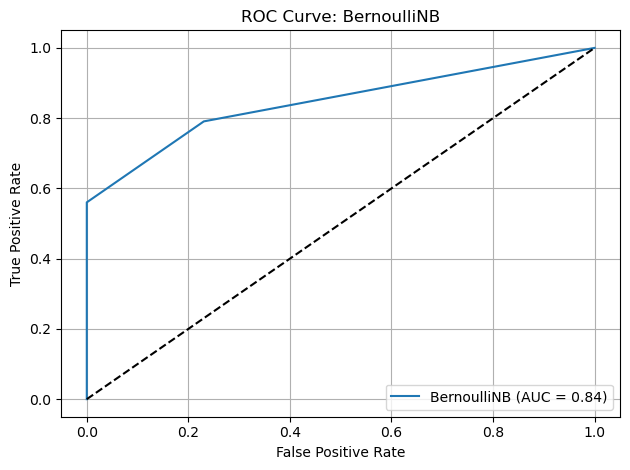

In [57]:
def plot_confusion(cm, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_roc(fpr, tpr, auc_score, title):
    plt.figure()
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve: {title}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Show all model results: accuracy, text confusion matrix, heatmap, and ROC
for model_name, results in evaluation_results.items():
    print(f"\n{model_name} Accuracy: {results['acc']:.4f}")
    
    # Print standard (text-based) confusion matrix
    print(f"{model_name} Confusion Matrix :")
    print(results["cm"])

    # Show visual confusion matrix
    plot_confusion(results["cm"], model_name)

    # Show ROC curve
    plot_roc(results["fpr"], results["tpr"], results["auc"], model_name)


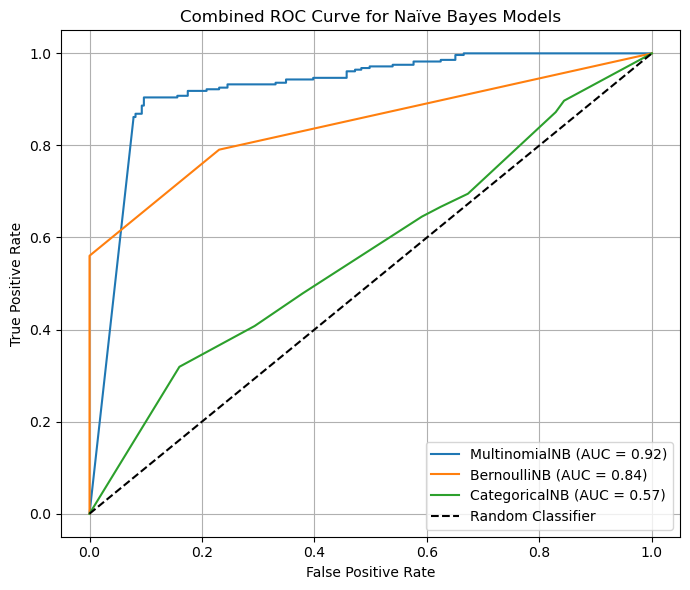

In [77]:
plt.figure(figsize=(7, 6))
for model_name, results in evaluation_results.items():
    plt.plot(results["fpr"], results["tpr"], label=f"{model_name} (AUC = {results['auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.title("Combined ROC Curve for Naïve Bayes Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()
